### Парсинг данных и создание датафрейма

In [10]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [11]:
runN = "*" # If take all runs set runN = "*"
paths = glob.glob(f"build/Run{runN}_nt_ParticleData_t*.csv")

In [12]:
with open(paths[0], 'r') as f:
    print(f"Headers from file: {paths[0]}")
    
#     lines = f.readline().strip()
#     print(lines)
#     columns = lines[1:]
#     columns = columns.split(",")
#     meta_len = 1

    hlines = []
    while True:
        line = f.readline()
        if len(line) == 0 or line[0] != '#':
            break
        hlines.append(line)
    title = hlines[1].replace('#title ', '')[:-1]
    sep = chr(int(hlines[2].replace('#separator ', '')[:-1]))
    vsc_sep = chr(int(hlines[3].replace('#vector_separator ', '')[:-1]))
    columns = [' '.join(l.split(' ')[2:])[:-1] for l in hlines[4:]]
    meta_len = len(hlines)
    print(f'Metarows: {meta_len}\nColumns: {columns}')

Headers from file: build/Run0_nt_ParticleData_t3.csv
Metarows: 13
Columns: ['particle_name', 'parentID', 'X', 'Y', 'Z', 'vX', 'vY', 'vZ', 'energy']


In [13]:
data = pd.DataFrame()
for path in paths:
    item = pd.read_csv(path, skiprows=meta_len, names=columns)
    data = pd.concat([data, item], ignore_index=True)

e - elecron, Brem - тормозное излучение, Ionic - ионизационные потери (неупругое)

conv - обратная аннигилияция (фотоны в электроны и позитроны)

annihil - аннигилиция

phot - фотоэффект

In [14]:
data.head()

,particle_name,parentID,X,Y,Z,vX,vY,vZ,energy
0,gamma,0,-0.201918,2.51841,-100.0000,0.000000,0.000000,15.000000,13.61760
1,e-,1,-0.201918,2.51841,97.0396,1.004460,-0.526819,1.427350,1.32105
2,gamma,0,0.362850,1.70980,-100.0000,0.000000,0.000000,15.000000,15.00000
3,gamma,0,0.306296,1.59602,-100.0000,0.000000,0.000000,15.000000,0.00000
4,O16,1,0.306296,1.59602,-19.4832,-0.136246,0.213305,0.044789,0.00000


In [15]:
filt = data[data['creator_process'] == 'conv']
filt = filt[filt['parentID'] == 1]
filt.describe()

KeyError: 'creator_process'

In [ ]:
filt_ep= filt[filt['particle_name'] == 'e+']
filt_em = filt[filt['particle_name'] == 'e-']

In [ ]:
primary = data[data["parentID"] == 0]
primary_energy = sum(primary['energy'])
primary_energy

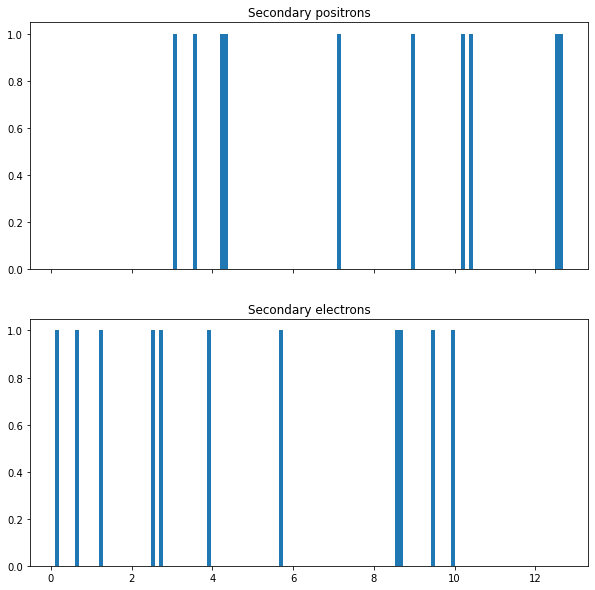

In [16]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(10,10))
ax[0].hist(filt_ep['energy'], bins=100)
ax[0].title.set_text('Secondary positrons')
ax[1].hist(filt_em['energy'], bins=100)
ax[1].title.set_text('Secondary electrons')
plt.show()